## Scenarios

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_hdf('scenarios.h5', key = 'value_v2g')
df.index.freq = df.index.inferred_freq  # might also work if it's inferrable

In [3]:
df.tail()

base_case   no_losses  misspecified_losses  \
2019-12-27  138.274398  163.200903           133.051040   
2019-12-28  138.261311  163.487594           132.999534   
2019-12-29  138.249536  163.706365           133.044858   
2019-12-30  138.104893  164.233866           132.959469   
2019-12-31  137.590955  164.654681           132.295294   

            weaker_guarantee_and_exclusion  weaker_guarantee_and_penalty  \
2019-12-27                       15.347123                    295.274026   
2019-12-28                       15.347123                    293.980443   
2019-12-29                       15.347123                    293.801490   
2019-12-30                       14.521999                    295.231766   
2019-12-31                       13.696875                    295.884556   

            unidirectional  
2019-12-27       16.537916  
2019-12-28       16.537916  
2019-12-29       16.537916  
2019-12-30       15.779803  
2019-12-31       15.002856

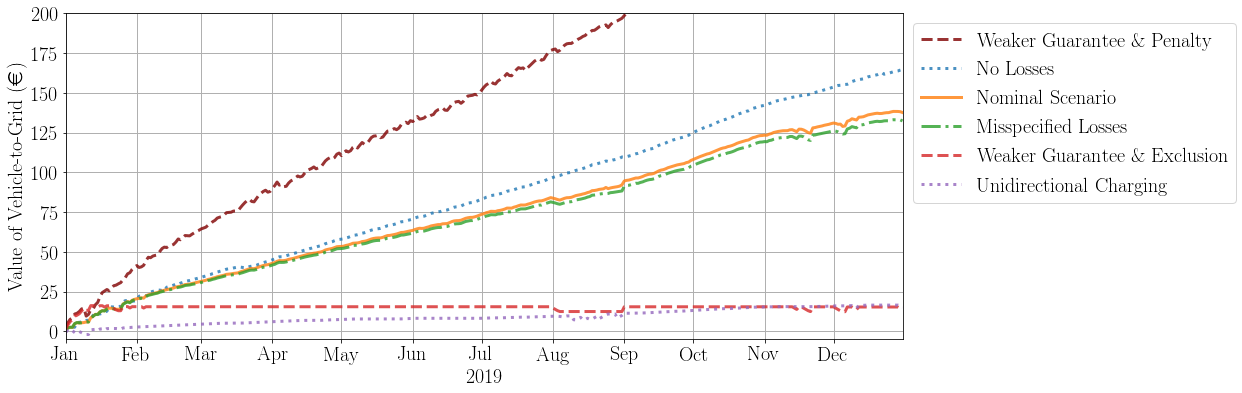

In [6]:
transp = 0.8
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{eurosym}')
fig = plt.figure(figsize=[15, 6])
plt.rcParams.update({'font.size': 20})
# scenarios
plt.plot(df.index, df['weaker_guarantee_and_penalty'], '--', label='Weaker Guarantee \& Penalty', linewidth=3, alpha = transp, color = 'maroon')
plt.plot(df.index, df['no_losses'], ':', label='No Losses', linewidth=3, alpha = transp)
plt.plot(df.index, df['base_case'], label='Nominal Scenario', linewidth=3, alpha = transp)
plt.plot(df.index, df['misspecified_losses'], '-.', label='Misspecified Losses', linewidth=3, alpha = transp)
plt.plot(df.index, df['weaker_guarantee_and_exclusion'], '--', label='Weaker Guarantee \& Exclusion', linewidth=3, alpha = transp)
plt.plot(df.index, df['unidirectional'], ':', label='Unidirectional Charging', linewidth=3, alpha = transp)
# layout
plt.ylim([-5, 200])
plt.grid(linewidth=1)
plt.yticks(np.arange(201, step = 25))
plt.xlabel('2019')
plt.ylabel(r'Value of Vehicle-to-Grid (\EUR)')
plt.legend(frameon=True, bbox_to_anchor=(1,1), loc="upper left")
plt.xlim([df.index[0], df.index[-1]])
Tres = 'MS'
plt.xticks(pd.date_range('01-01-2019 00:00:00', '12-31-2019 23:30:00', freq= Tres), pd.date_range('01-01-2019 00:00:00', '12-31-2019 23:30:00', freq=Tres).strftime('%b'))
fig.savefig('scenarios.pdf',bbox_inches='tight')